In [1]:
# %%
from SonicBatt import utils
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

root_dir = utils.root_dir()
study_path = os.path.join(root_dir, 'studies', 'multi-cell_ml')
data_path = os.path.join(study_path, 'Raw Data')
visualistion_path = os.path.join(study_path, 'Visualisation')
ancillary_data_path = os.path.join(study_path, 'Ancillary Data')

database = pd.read_excel(os.path.join(data_path, 'database.xlsx'))

parquet_filename = 'signals_peaks_fft.parquet'
parquet_filepath = os.path.join(ancillary_data_path, parquet_filename)
df = pd.read_parquet(parquet_filepath)

time_step = 2.5e-03 #microseconds
acoustic_x = np.arange(4000) * time_step
figsize = (8,3.5)

plt.rcParams['axes.labelsize'] = 22
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16


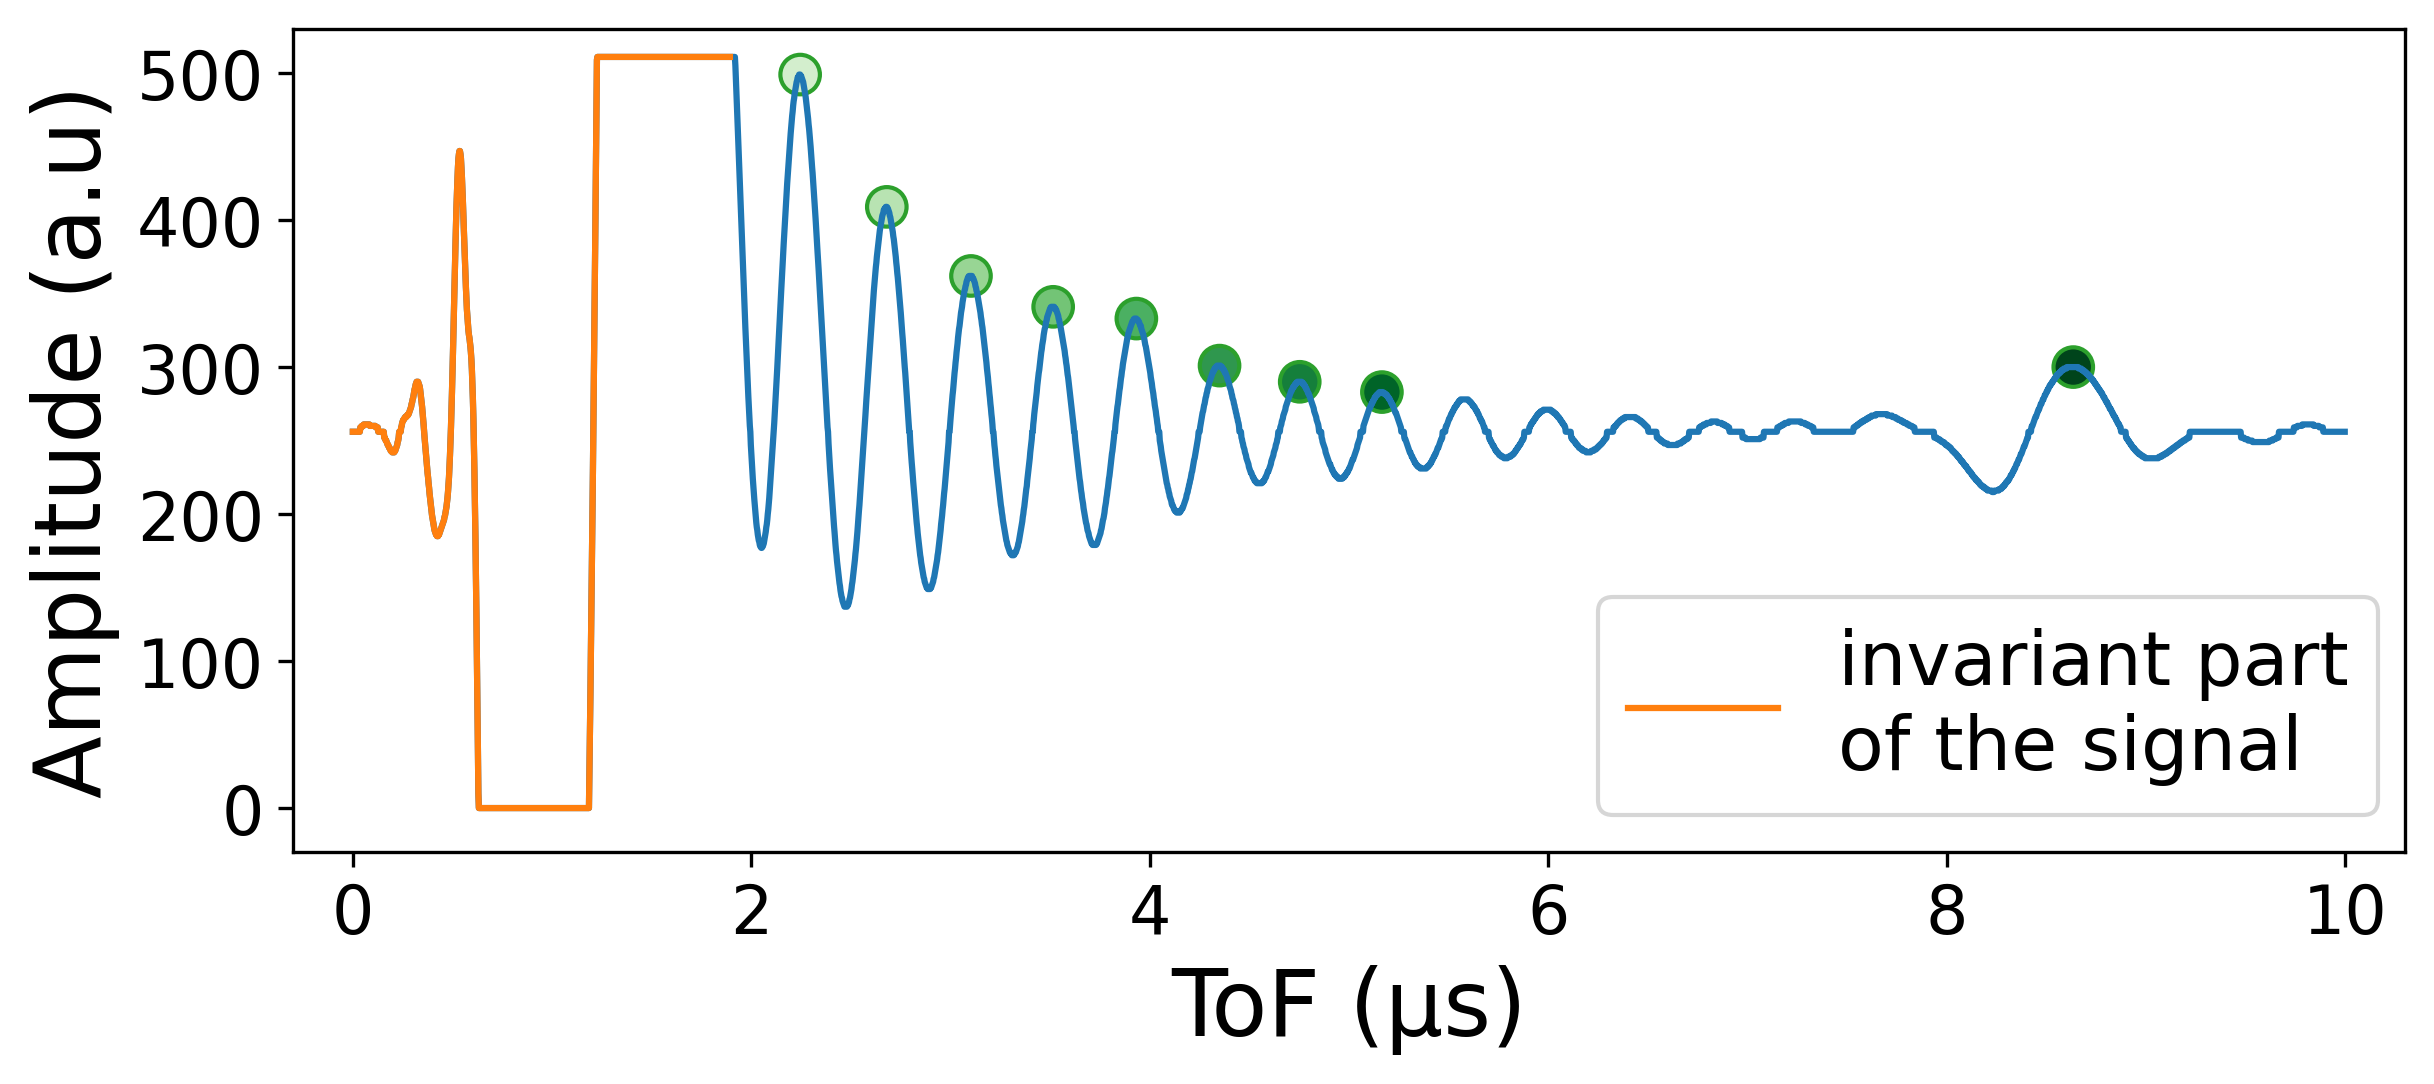

In [2]:
# %%
# Example signal with peaks
crop_ind = 758
signal = df['acoustics'].iloc[0].to_numpy()
peak_heights = df['peak_heights'].iloc[0].to_numpy()
peak_tofs = df['peak_tofs'].iloc[0].to_numpy()

n_peaks = len(peak_heights)
peaks_colorscheme = cm.Greens(np.linspace(0.2, 1, n_peaks))
f, axs = plt.subplots(1,1, figsize=figsize, dpi=300, constrained_layout=True)
f.patch.set_facecolor('white')

axs.plot(acoustic_x, signal)
axs.scatter(peak_tofs, peak_heights, marker='o', s = 90,
    c = peaks_colorscheme, edgecolors='tab:green')
x1_time_domain = acoustic_x[:crop_ind]
y1_time_domain = signal[:crop_ind]
axs.plot(x1_time_domain, y1_time_domain, color='tab:orange', label='invariant part\nof the signal')
axs.legend(loc='lower left', bbox_to_anchor=(0.60, 0), fontsize=18)
axs.set_xlabel('ToF (μs)')
axs.set_ylabel('Amplitude (a.u)')
axs.set_xlim(-0.3, 10.3)
axs.set_ylim(-30, 530)

save_filename = 'Example signal'
utils.save_figure(f, visualistion_path, save_filename, 'pdf')


C:\Users\elias\AppData\Local\Temp\ipykernel_30508\789121601.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs.scatter(peak_tofs[-1], peak_heights[-1], marker='o', s = 90,


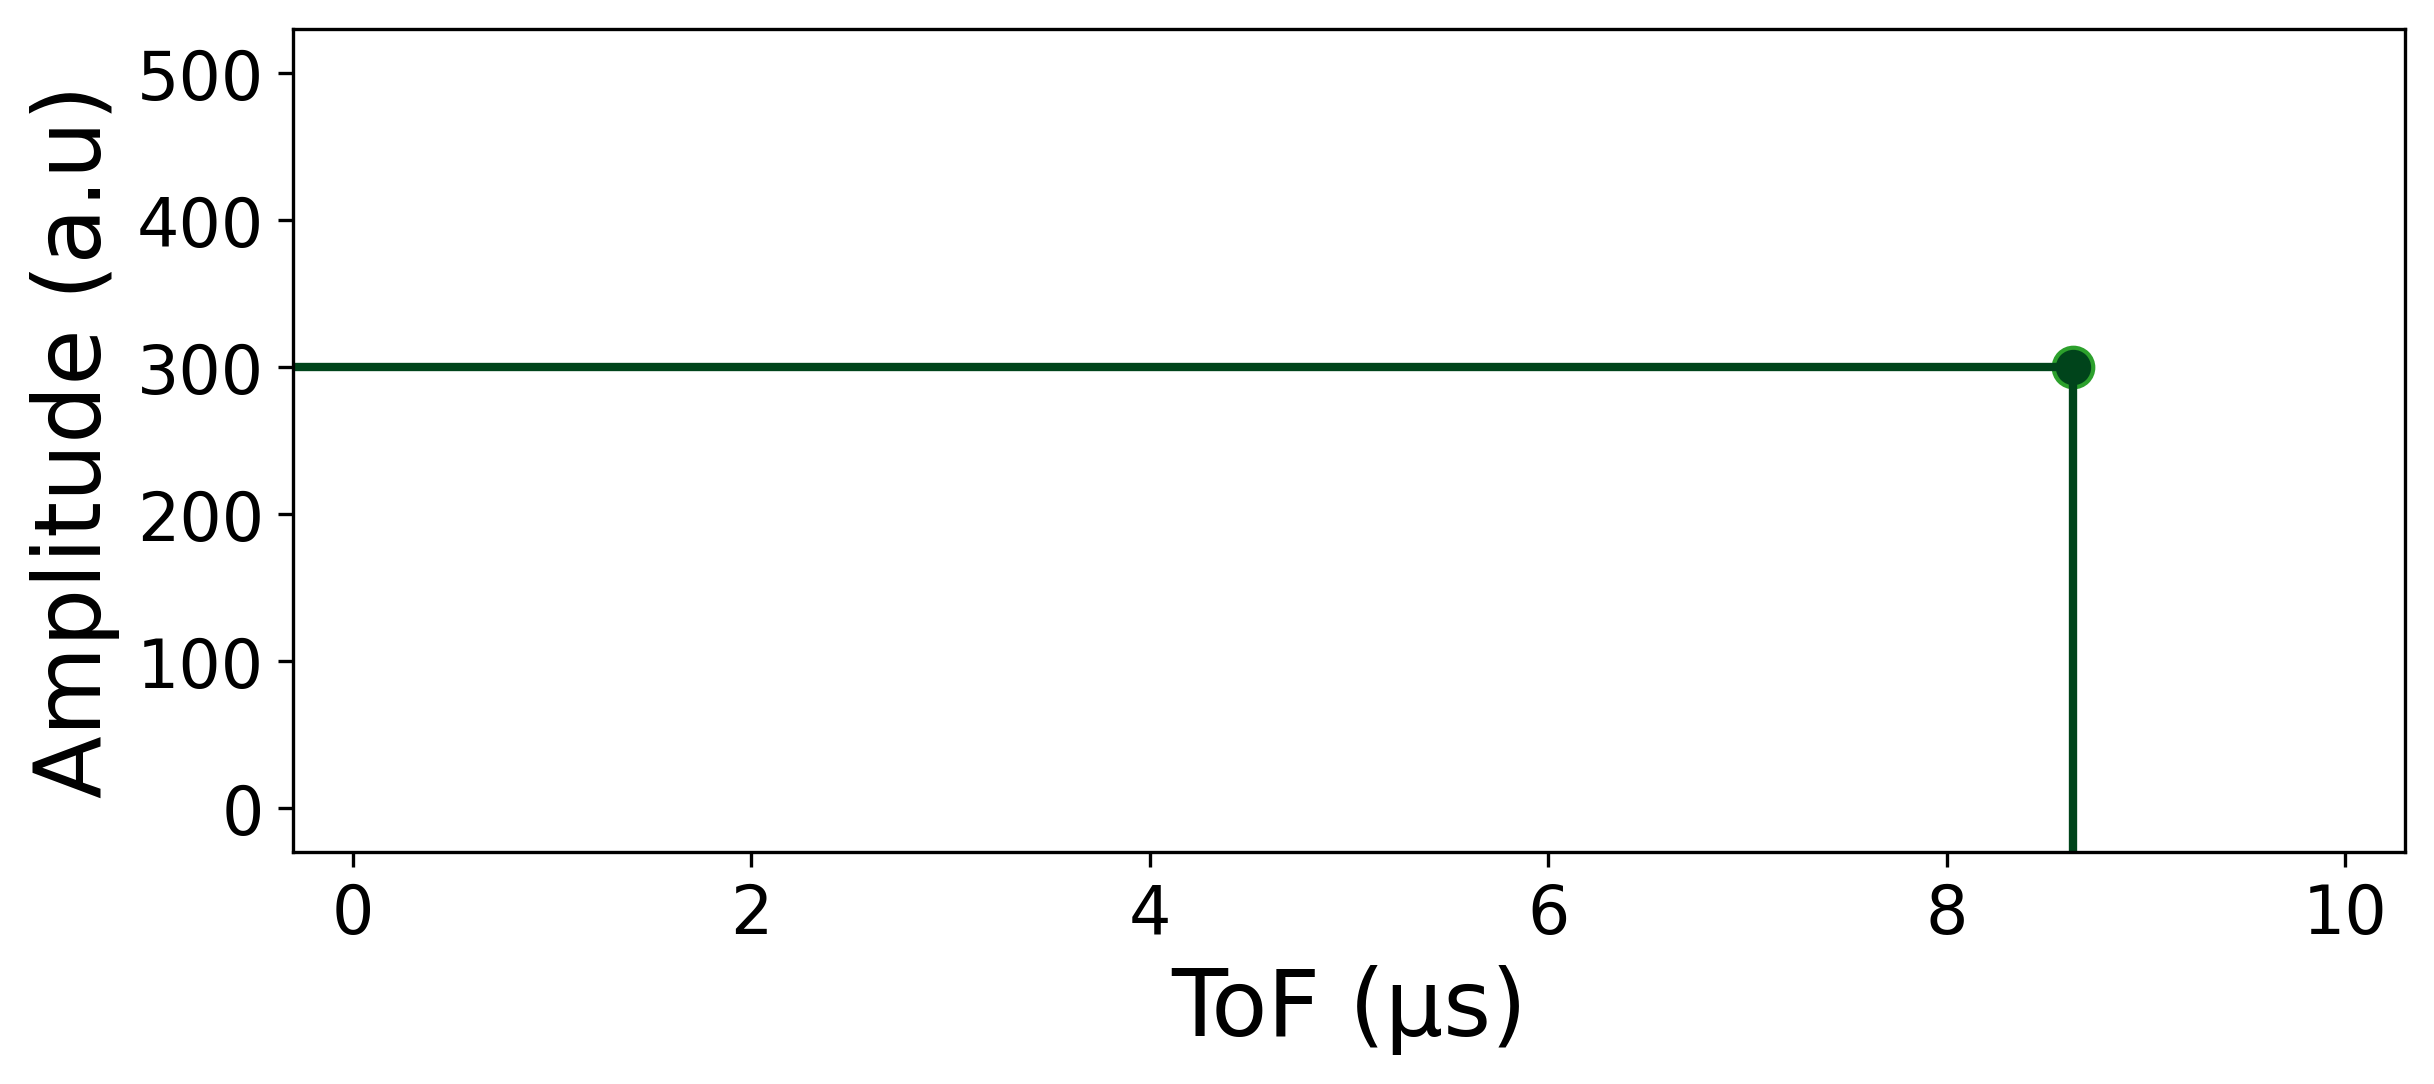

In [3]:
# %%
# Data config A
f, axs = plt.subplots(1,1, figsize=figsize, dpi=300, constrained_layout=True)
f.patch.set_facecolor('white')
axs.scatter(peak_tofs[-1], peak_heights[-1], marker='o', s = 90,
    c = peaks_colorscheme[-1], edgecolors='tab:green')

x_values_1 = [peak_tofs[-1], peak_tofs[-1]]
y_values_1 = [-50, peak_heights[-1]]
axs.plot(x_values_1, y_values_1, marker=None, linewidth=2,
            c = peaks_colorscheme[-1])

x_values_2 = [-1, peak_tofs[-1]]
y_values_2 = [peak_heights[-1], peak_heights[-1]]
axs.plot(x_values_2, y_values_2, marker=None, linewidth=2,
            c = peaks_colorscheme[-1])

axs.set_xlabel('ToF (μs)')
axs.set_ylabel('Amplitude (a.u)')
axs.set_xlim(-0.3, 10.3)
axs.set_ylim(-30, 530)

save_filename = 'Config A'
utils.save_figure(f, visualistion_path, save_filename, 'pdf')


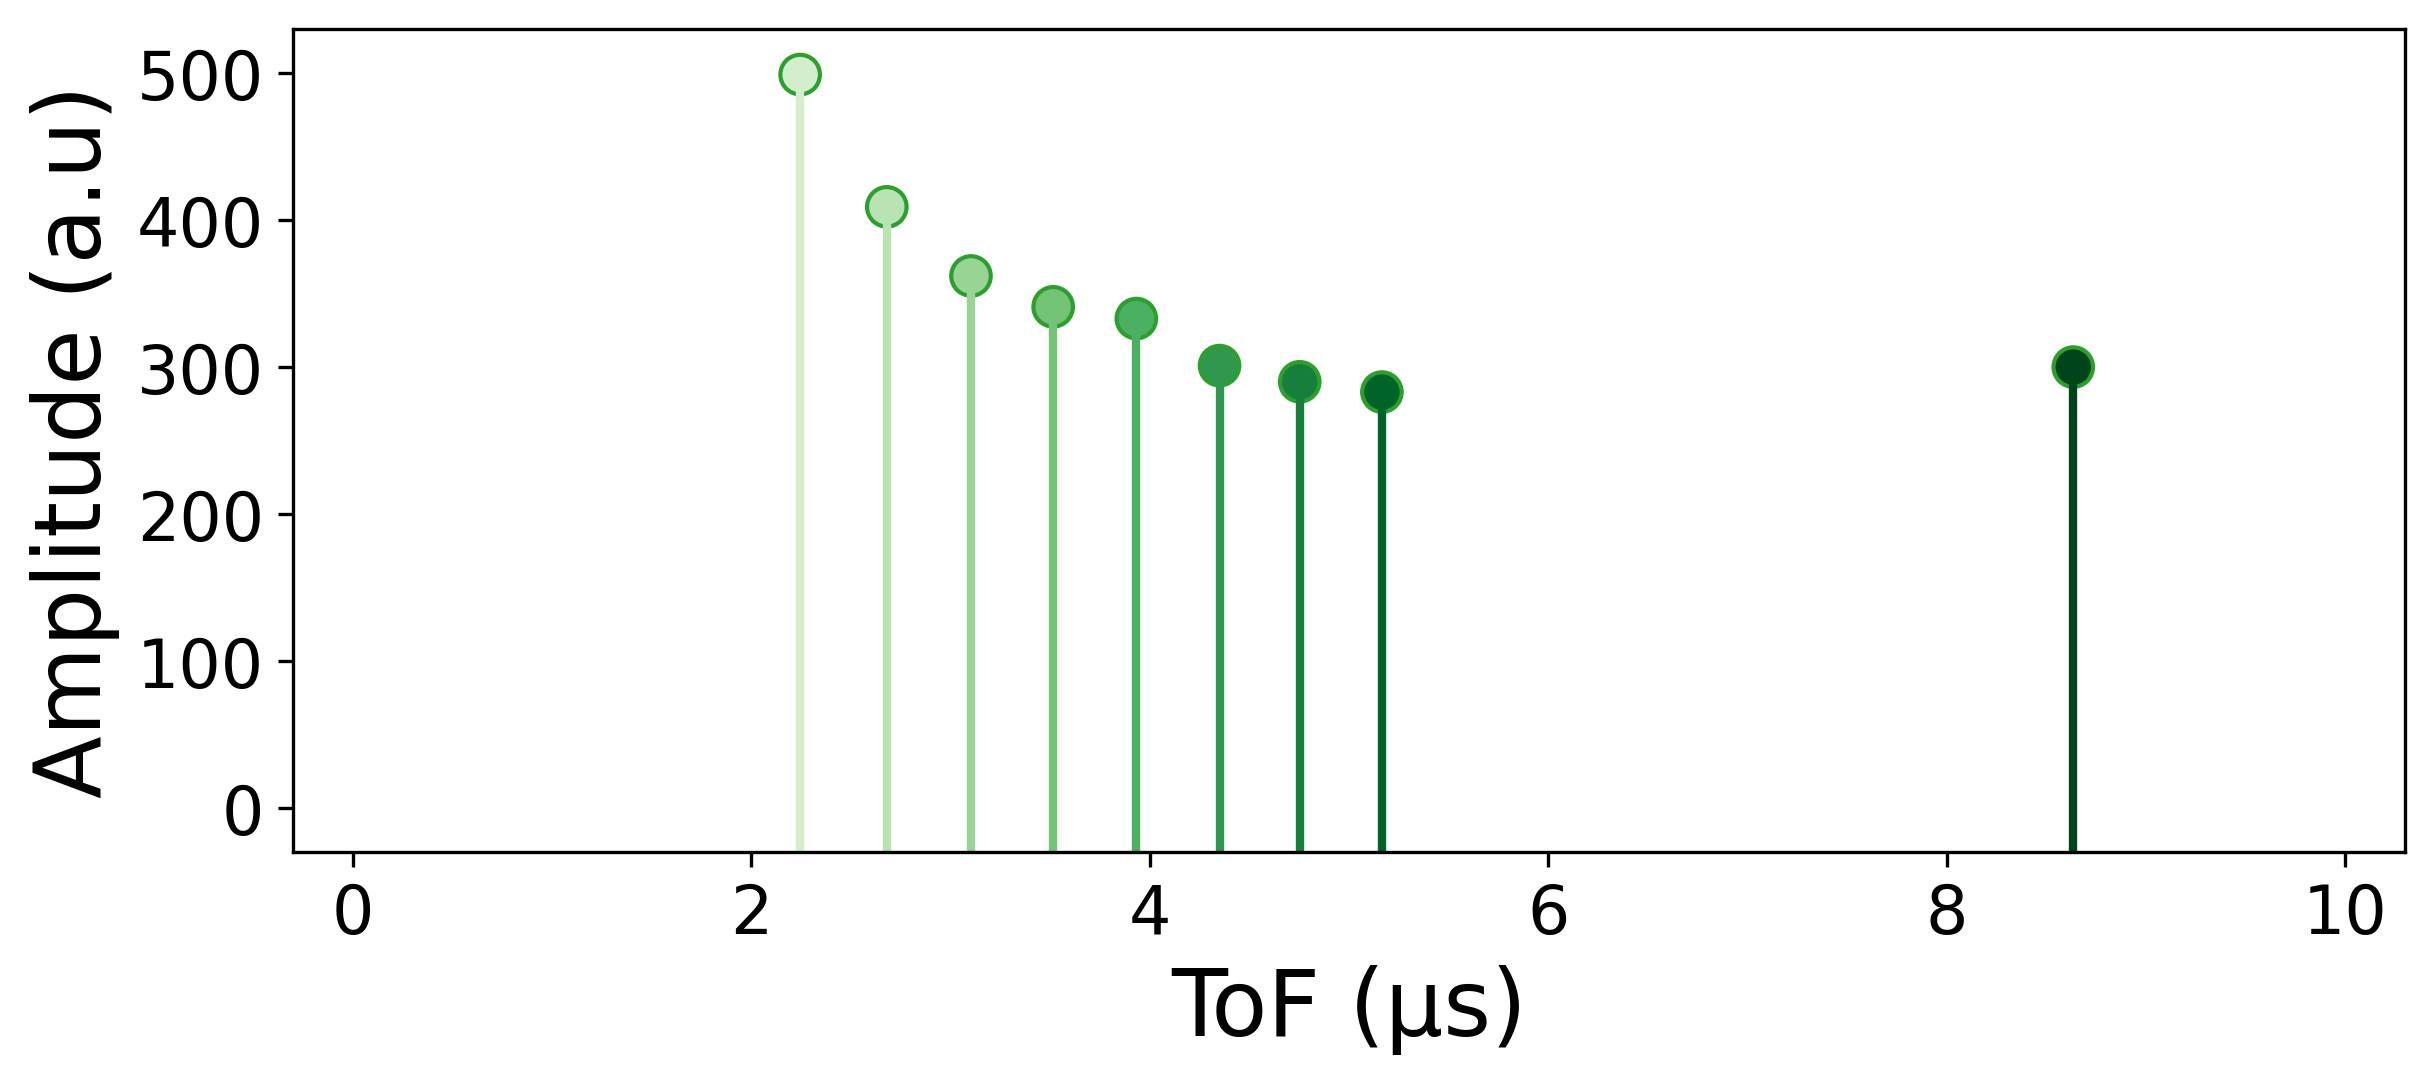

In [4]:
# %%
# Data config B
f, axs = plt.subplots(1,1, figsize=figsize, dpi=300, constrained_layout=True)
f.patch.set_facecolor('white')
axs.scatter(peak_tofs, peak_heights, marker='o', s = 90,
    c = peaks_colorscheme, edgecolors='tab:green')

for i in range(9):
    x_values = [peak_tofs[i], peak_tofs[i]]
    y_values = [-50, peak_heights[i]]
    axs.plot(x_values, y_values, marker=None, linewidth=2,
             c = peaks_colorscheme[i])

axs.set_xlabel('ToF (μs)')
axs.set_ylabel('Amplitude (a.u)')
axs.set_xlim(-0.3, 10.3)
axs.set_ylim(-30, 530)

save_filename = 'Config B'
utils.save_figure(f, visualistion_path, save_filename, 'pdf')


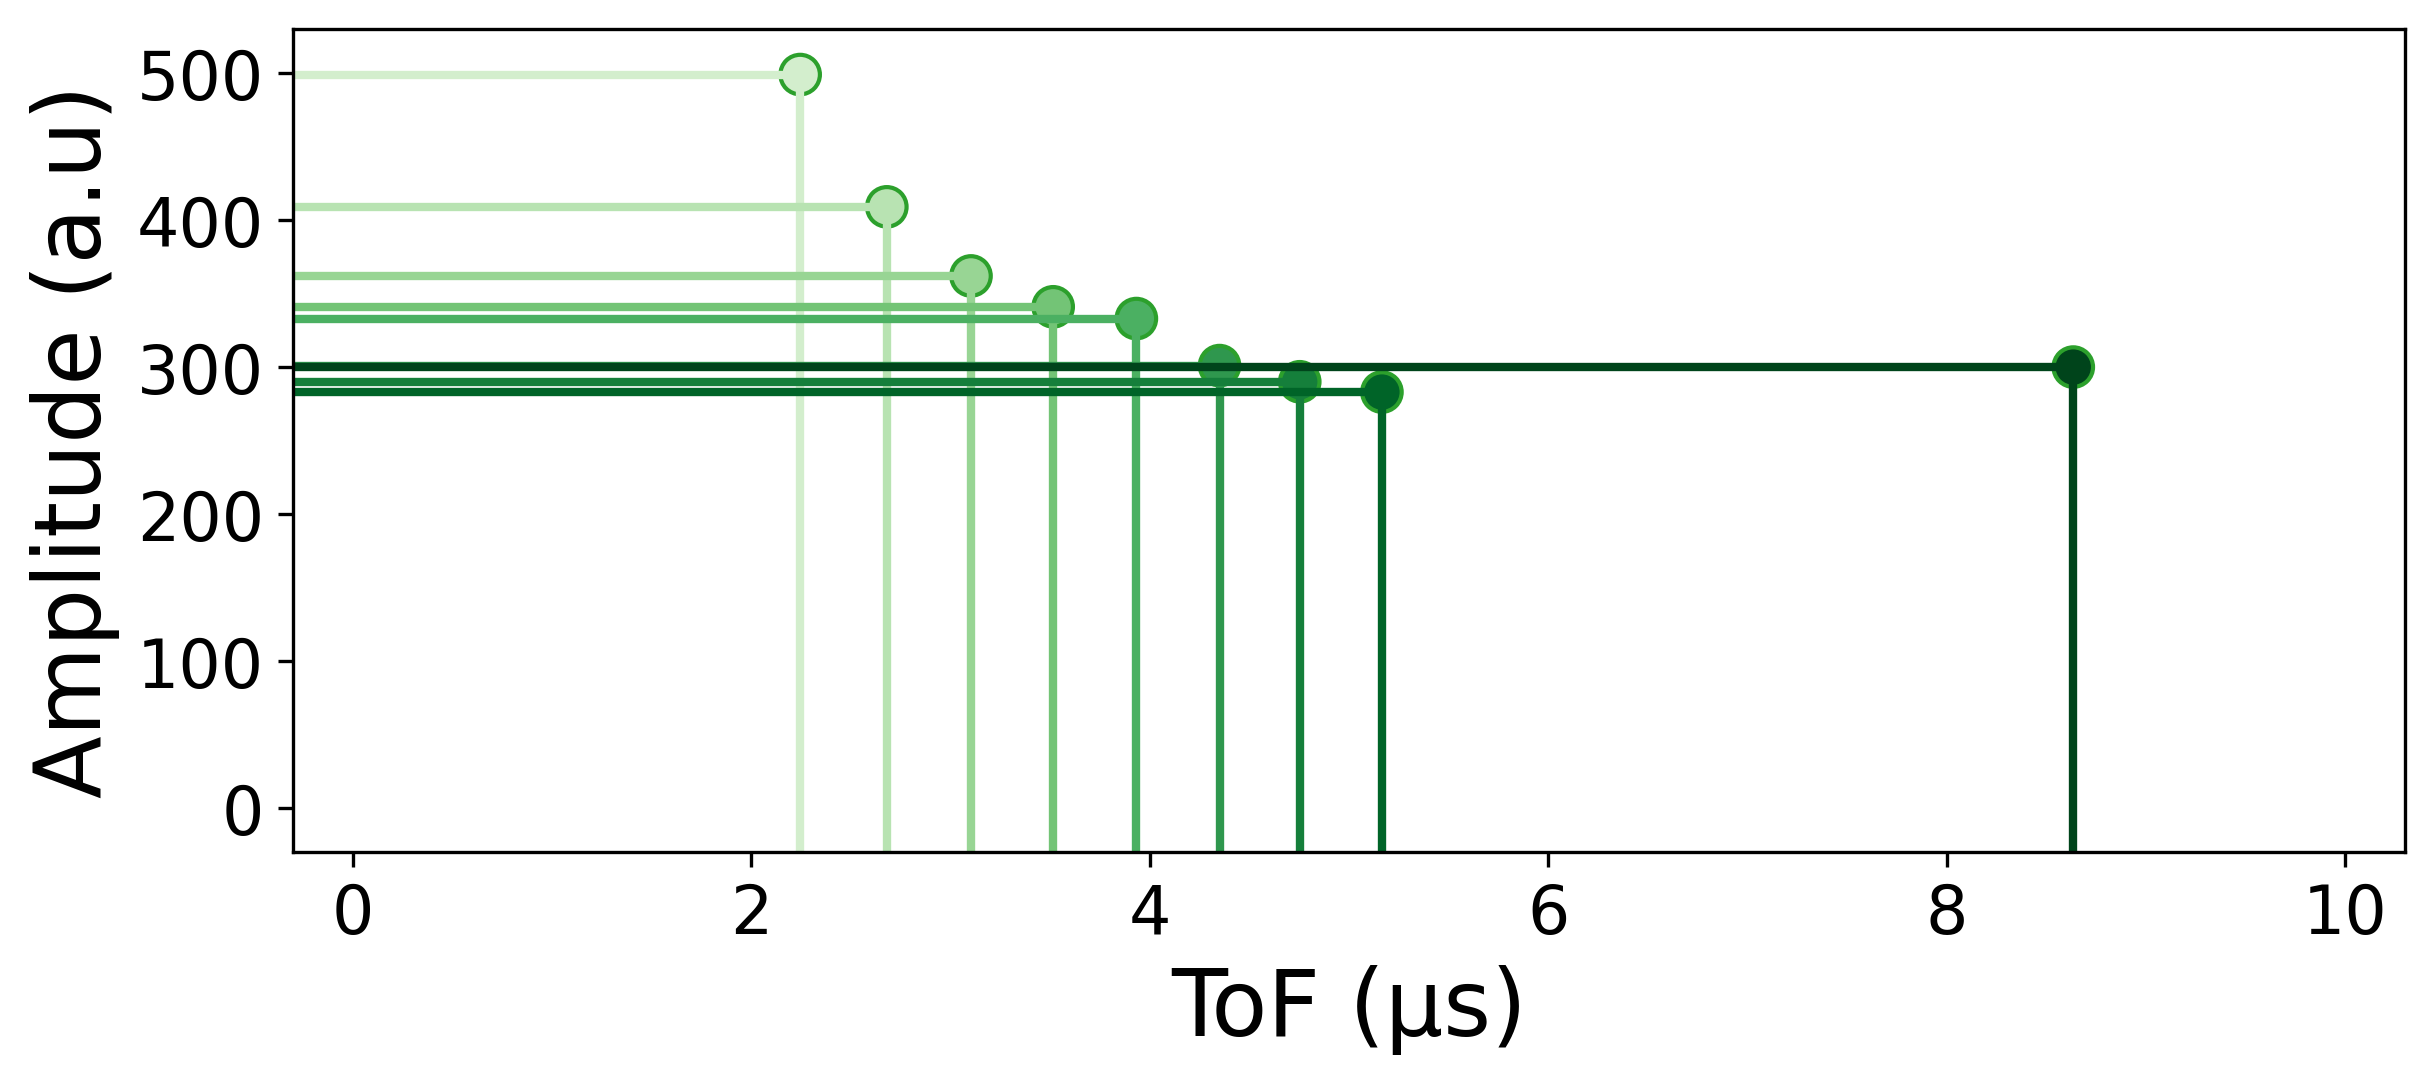

In [5]:
# %%
# Data config C
f, axs = plt.subplots(1,1, figsize=figsize, dpi=300, constrained_layout=True)
f.patch.set_facecolor('white')
axs.scatter(peak_tofs, peak_heights, marker='o', s = 90,
    c = peaks_colorscheme, edgecolors='tab:green')

for i in range(9):
    x_values_1 = [peak_tofs[i], peak_tofs[i]]
    y_values_1 = [-50, peak_heights[i]]
    axs.plot(x_values_1, y_values_1, marker=None, linewidth=2,
             c = peaks_colorscheme[i])

    x_values_2 = [-1, peak_tofs[i]]
    y_values_2 = [peak_heights[i], peak_heights[i]]
    axs.plot(x_values_2, y_values_2, marker=None, linewidth=2,
             c = peaks_colorscheme[i])

axs.set_xlabel('ToF (μs)')
axs.set_ylabel('Amplitude (a.u)')
axs.set_xlim(-0.3, 10.3)
axs.set_ylim(-30, 530)

save_filename = 'Config C'
utils.save_figure(f, visualistion_path, save_filename, 'pdf')


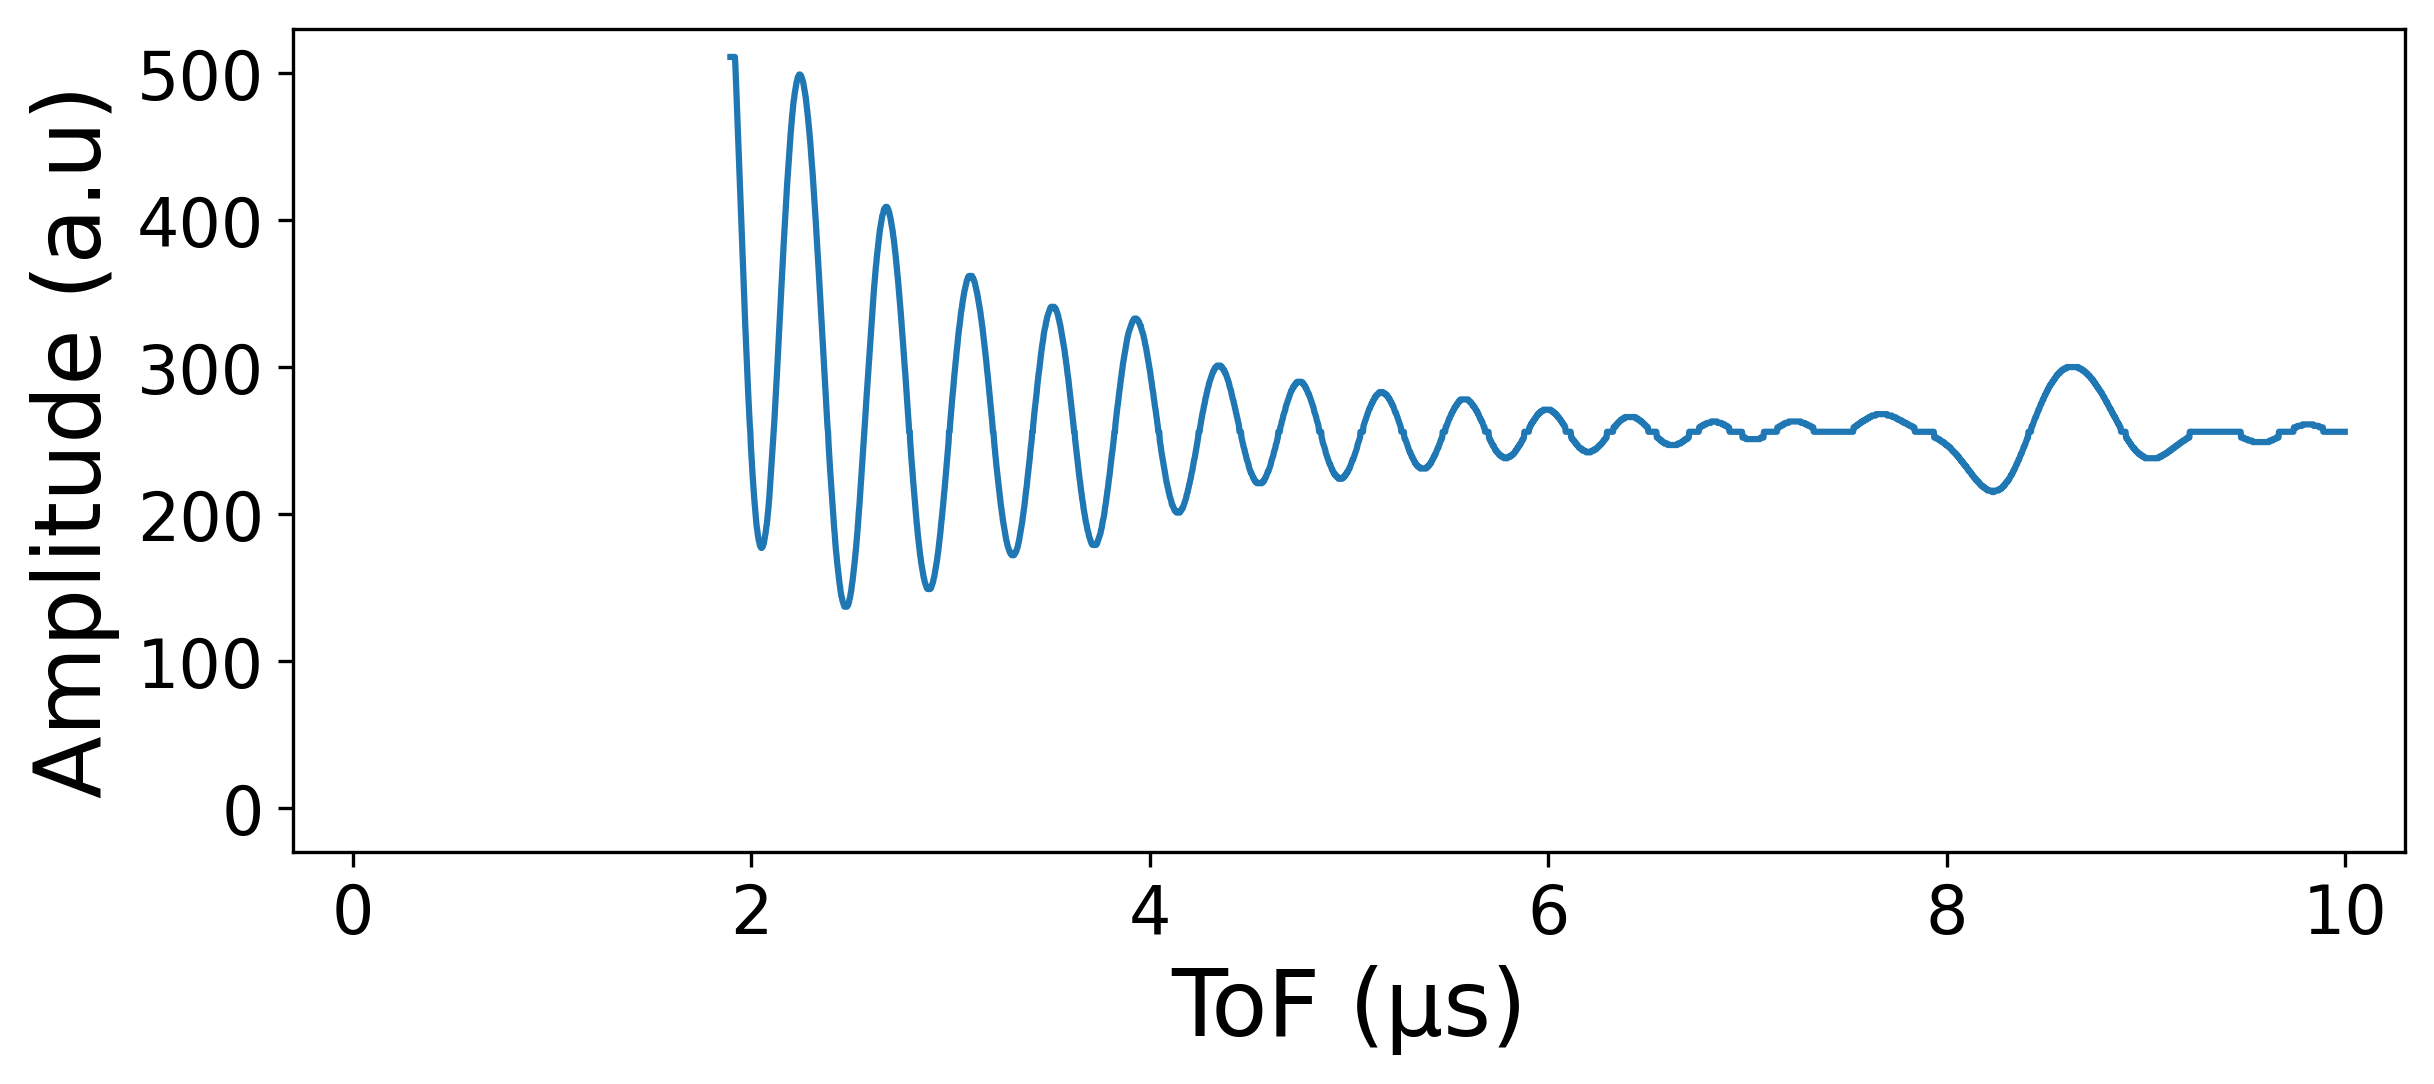

In [6]:
# %%
# Data config D
crop_ind = 758

f, axs = plt.subplots(1,1, figsize=figsize, dpi=300, constrained_layout=True)
f.patch.set_facecolor('white')

x1_time_domain = acoustic_x[crop_ind:]
y1_time_domain = signal[crop_ind:]
axs.plot(x1_time_domain, y1_time_domain, color='tab:blue')
axs.set_xlabel('ToF (μs)')
axs.set_ylabel('Amplitude (a.u)')
axs.set_xlim(-0.3, 10.3)
axs.set_ylim(-30, 530)

save_filename = 'Config D'
utils.save_figure(f, visualistion_path, save_filename, 'pdf')


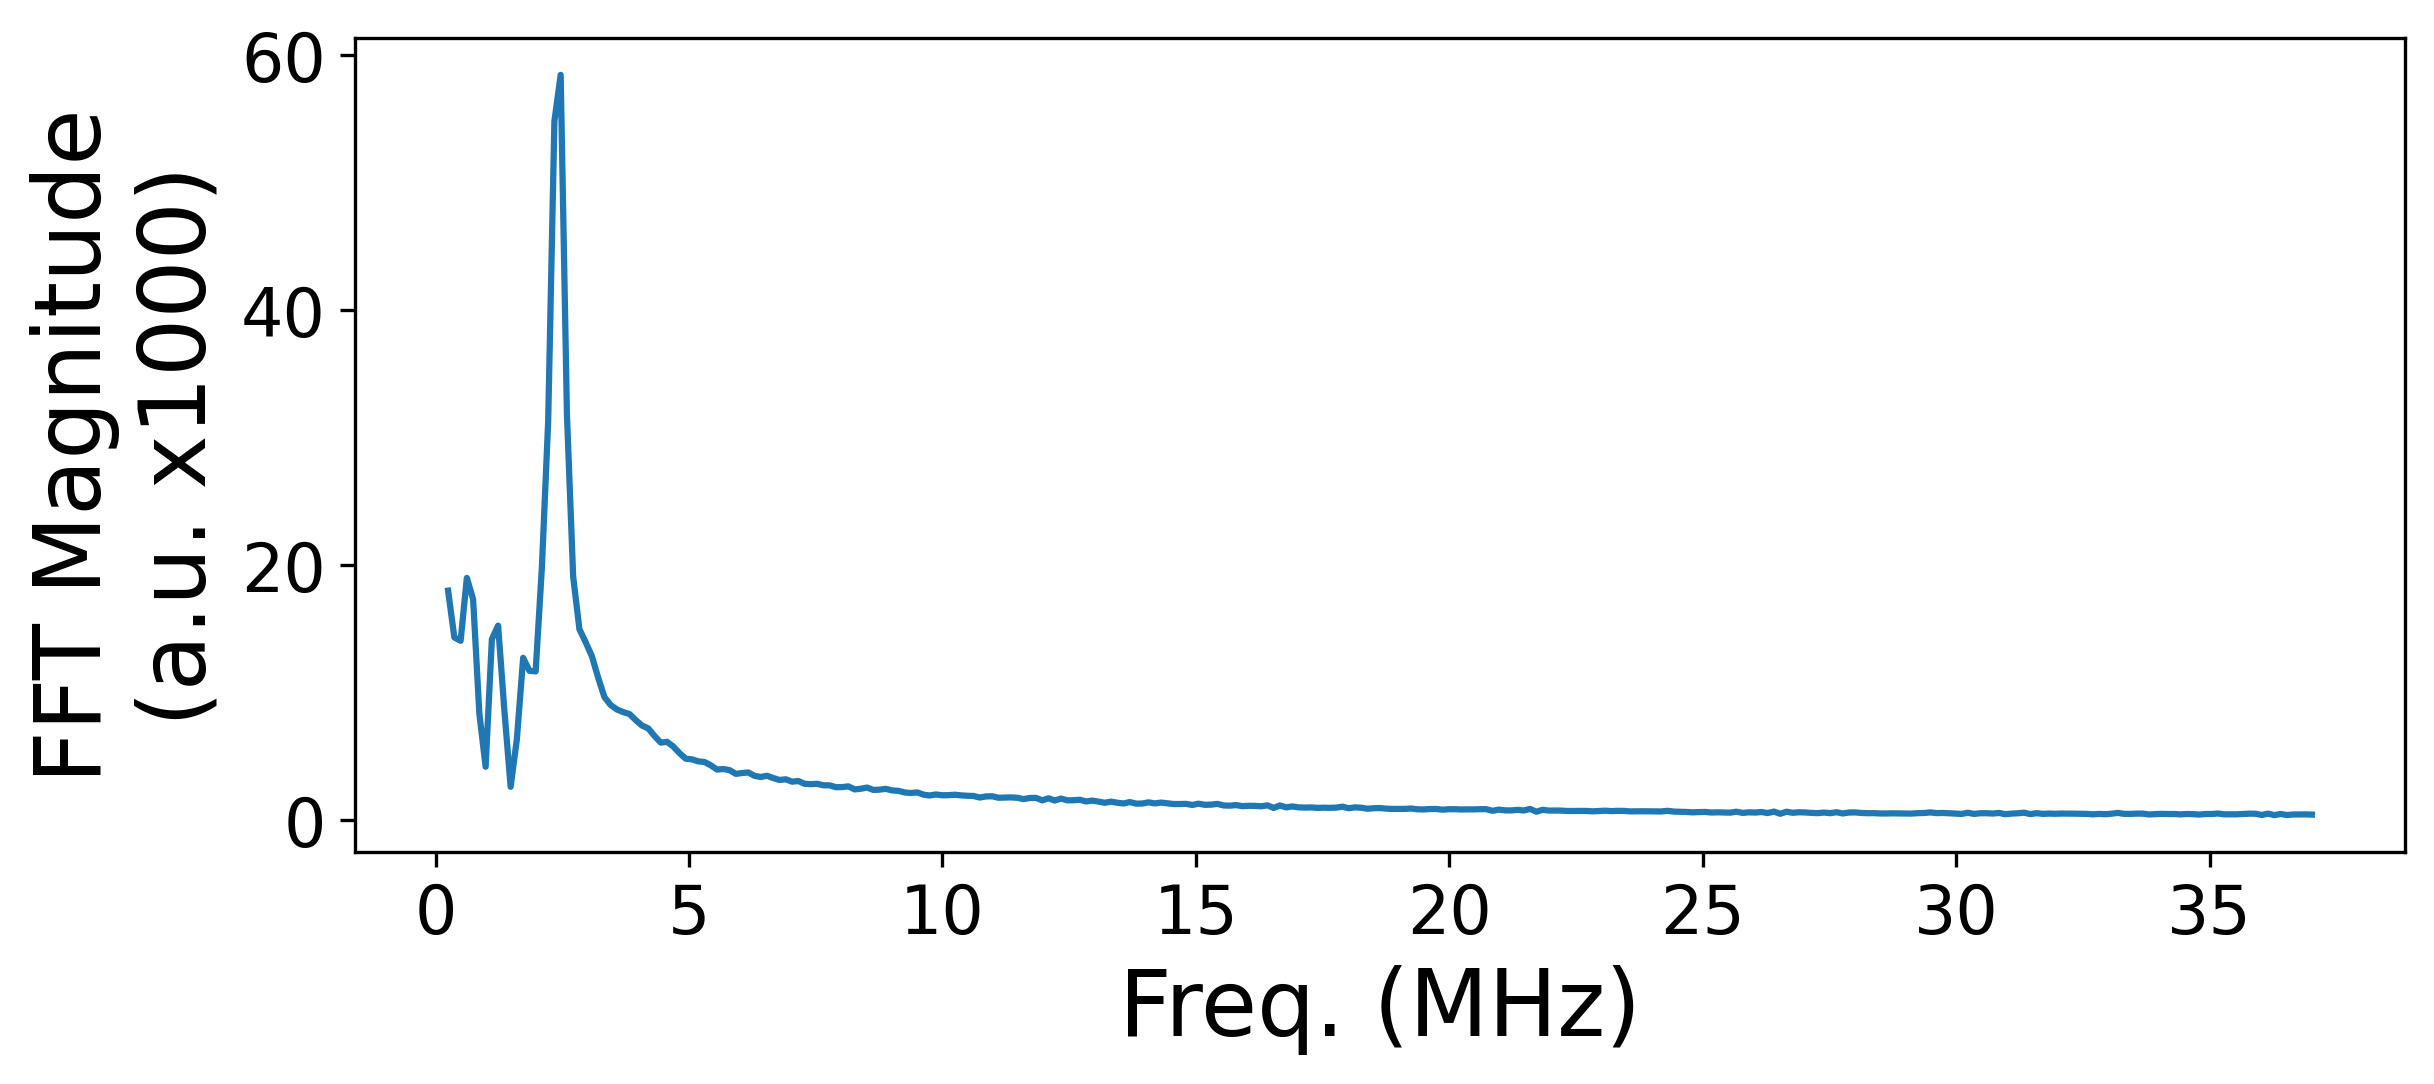

In [7]:
# %%
# Data config E
fft_magns = df['fft_magns'].iloc[0].to_numpy()
freqs_1d = np.loadtxt(os.path.join(ancillary_data_path, 'frequencies.txt'))
freqs = freqs_1d[1:301]

f, axs = plt.subplots(1,1, figsize=figsize, dpi=300, constrained_layout=True)
f.patch.set_facecolor('white')
axs.plot(freqs[1:], fft_magns[1:]/1000)

axs.set_xlabel('Freq. (MHz)')
axs.set_ylabel('FFT Magnitude\n(a.u. x1000)')

save_filename = 'Config E'
utils.save_figure(f, visualistion_path, save_filename, 'pdf')


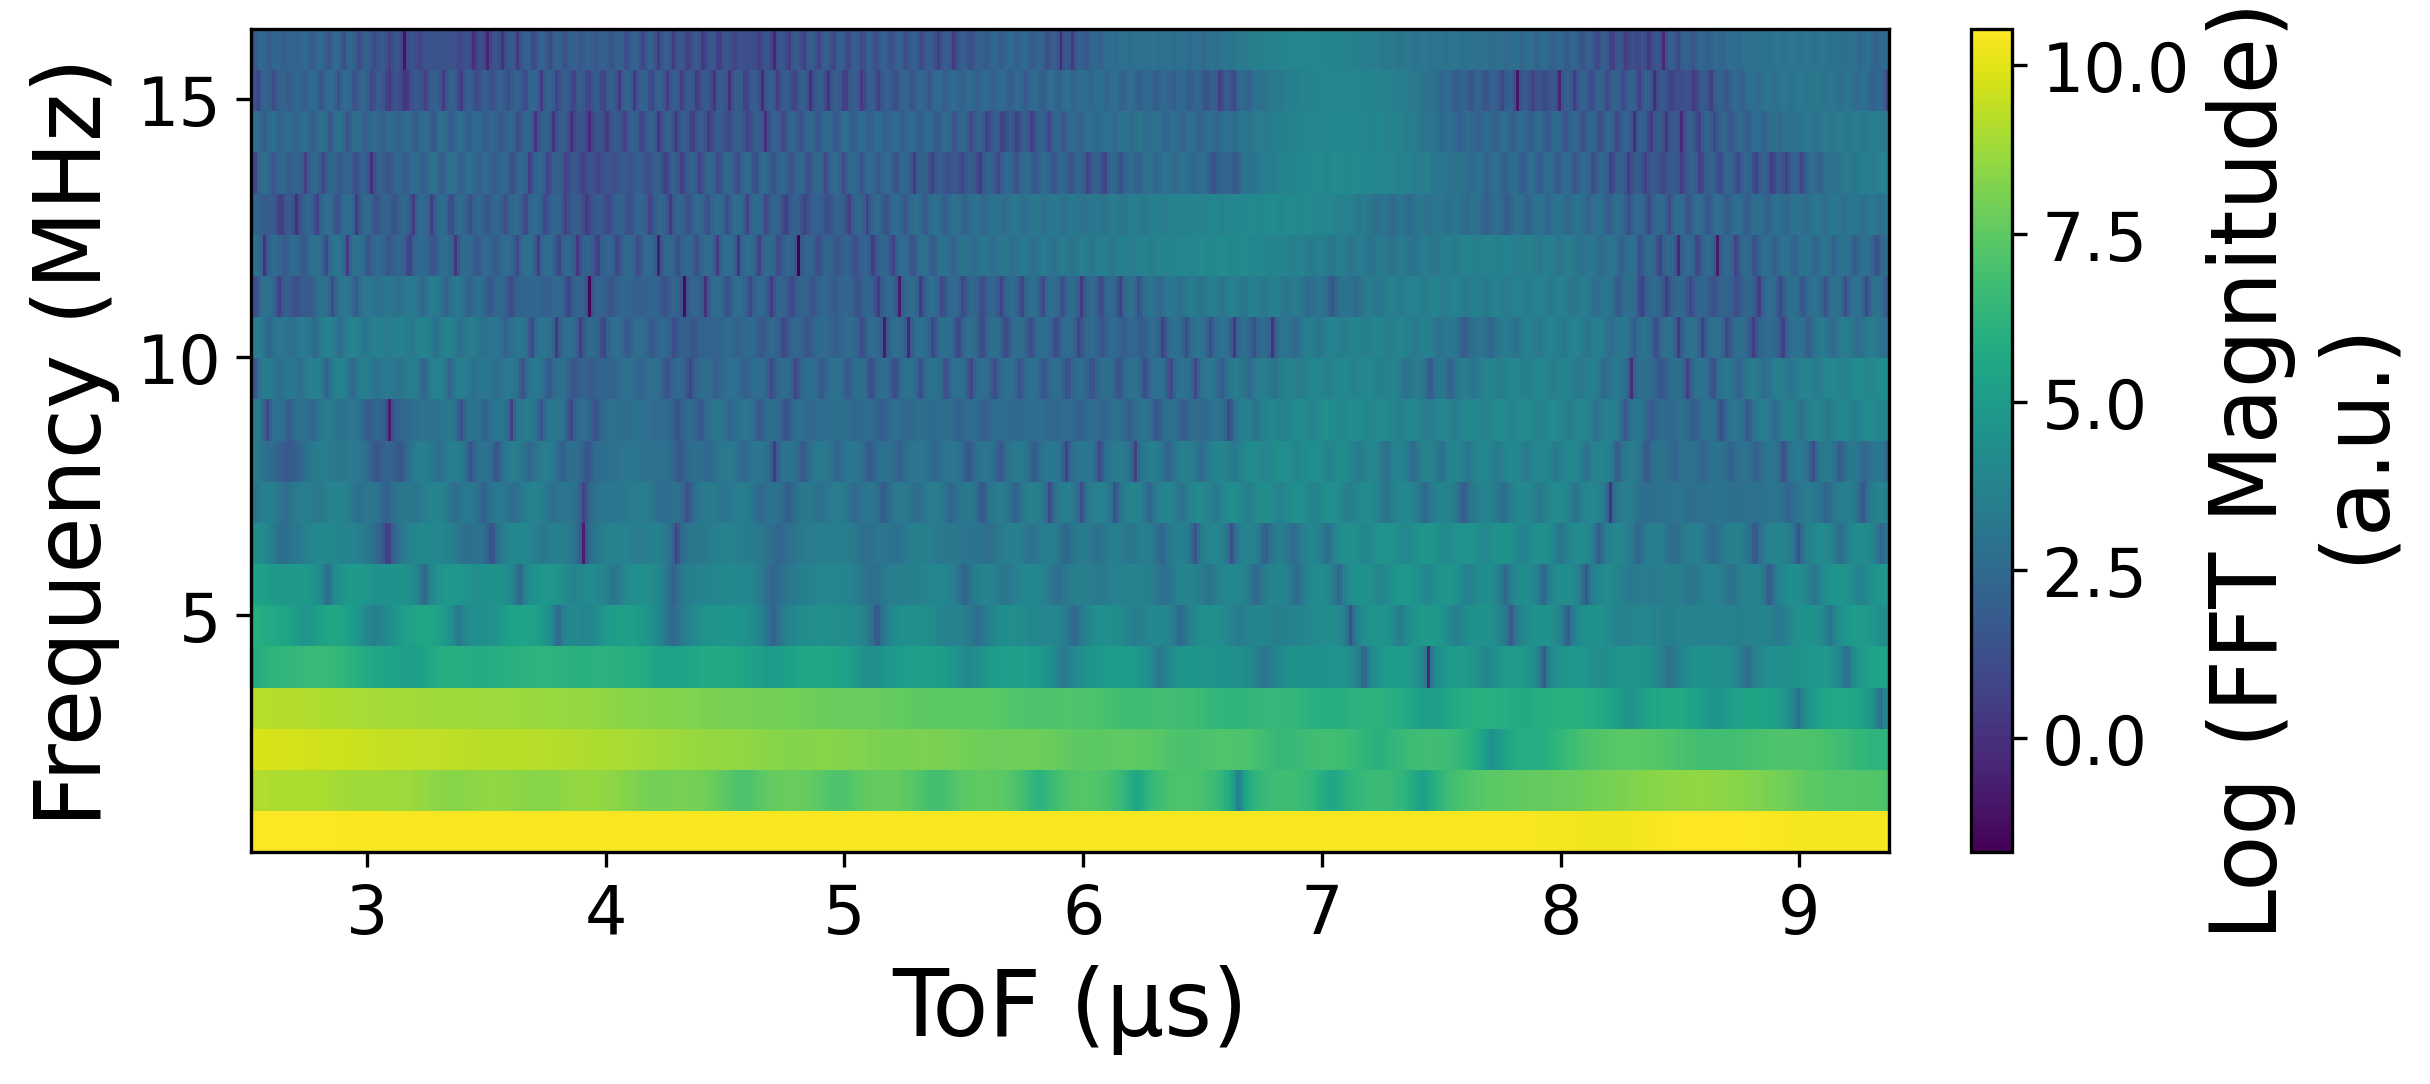

In [8]:
# %%
# Data config G
def plot_spectrogram(spectrogram, ax, freqs, frame_step, frame_length):
    # Convert the frequencies to log scale and transpose, so that the time is.
    # Represented on the x-axis (columns).
    # Add an epsilon to avoid taking a log of zero.
    log_spec = utils.spectrogram_data_for_plot(spectrogram)
    # 
    X = (758*time_step + 
         (np.array(range(log_spec.shape[1]))*frame_step)*time_step + 
         round(frame_length/2)*time_step)
    # ax.pcolormesh(X, Y, log_spec)
    pcm = ax.pcolormesh(X, freqs, log_spec)
    cbar = plt.colorbar(pcm, ax=ax)
    cbar.set_label('Log (FFT Magnitude)  \n(a.u.)')

frame_length = 501
frame_step = 5
crop_freq = 21

freqs = np.fft.rfftfreq(n=frame_length, d = time_step)[1:crop_freq] #MHz
waveform = df['acoustics'].iloc[0].to_numpy()[758:]
spectrogram = utils.make_spectrogram(
    waveform, frame_length=frame_length, frame_step=frame_step, 
    crop_freq=crop_freq, pad_end=False)

f, axs = plt.subplots(1,1, figsize=figsize, dpi=300, constrained_layout=True)
f.patch.set_facecolor('white')

plot_spectrogram(spectrogram, axs, freqs, frame_step, frame_length)
axs.set_xlabel('ToF (μs)')
axs.set_ylabel('Frequency (MHz)')

save_filename = 'Config G'
utils.save_figure(f, visualistion_path, save_filename, 'png')


In [ ]:
# %%